The goal of this project is to recommend images based on preferences of the user. We will build this system in three practical sessions.
We have to collect the following data.

    A set of images.
    Ask the user to select some images and add tags.
    We analyse user created-tags and information (like image size, predominant colors) of available images to propose new images to the user.

For this question, you have the following tasks to program:

    Create a folder called testimages.
    Download open-licensed images to the folder testimages.
    Save information of images (like predominant colors, tags, image size etc.) in a JSON file.

Ask the user to select some images and add tags. For every user, you are now in a position to build user-preference profile, based on this selection. You can collect information like

    Favorite colors
    Favorite image sizes (thumbnail images, large images, medium-size images etc.)
    Tags
    ...


Analyse des 4  couleurs des 10  images


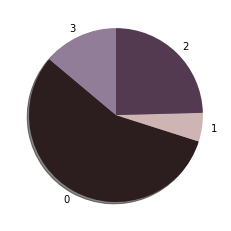

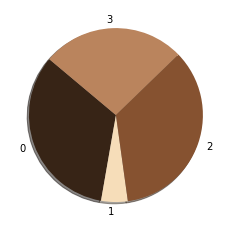

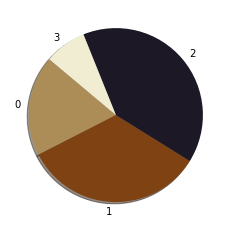

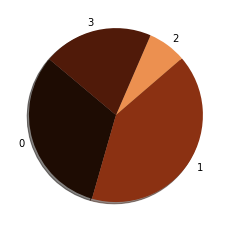

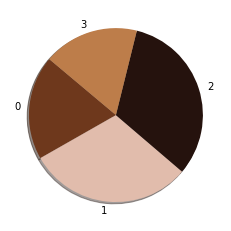

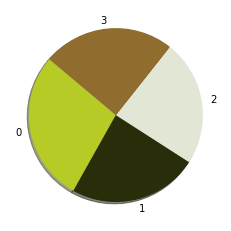

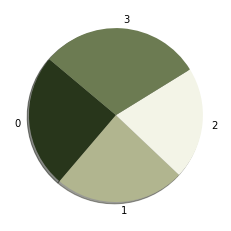

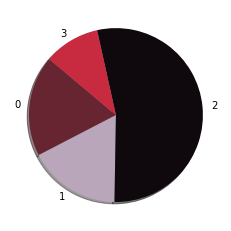

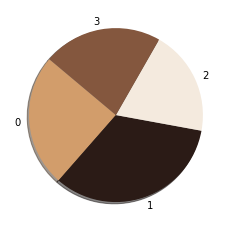

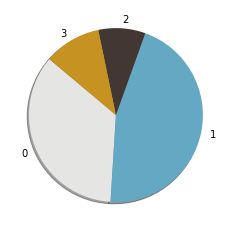

Fin, voir le fichier json


In [43]:
from PIL import Image


from operator import itemgetter
import numpy
import math
import matplotlib.pyplot as plot
import glob
import json
from sklearn.cluster import KMeans

listTotImage = glob.glob("project/testimages/*")
selectionMax = len(listTotImage) #Nombre d'images max selectionnées
n = 4
count = 0
print("Analyse des",n, " couleurs des",selectionMax," images")
f = open("project/data.json", "a")
f.write("[")
f.close()
for i in listTotImage:
    data = {}
    data['name'] = i
    data['tag'] = ""
    imgfile = Image.open(i)
    numarray = numpy.array(imgfile.getdata(), numpy.uint8)
    clusters = KMeans(n_clusters = n)
    clusters.fit(numarray)
    npbins = numpy.arange(0, n+1)
    #nbpins = array([0, 1, ..., n-1])
    histogram = numpy.histogram(clusters.labels_, bins=npbins)
    labels = numpy.unique(clusters.labels_)
    colors = []
    sizes = histogram[0]
    def rgb_to_hex(rgb):
        return "#%02x%02x%02x" % rgb
    for j in range(n):
        color = rgb_to_hex(
           (math.ceil(clusters.cluster_centers_[j][0]), 
            math.ceil(clusters.cluster_centers_[j][1]), 
            math.ceil(clusters.cluster_centers_[j][2])))
        colors.append(color)
    data["colors"] = colors
    data["intensity"] = sizes.tolist()
    with open('project/data.json', 'a') as outfile:
        json.dump(data, outfile)
        if(count != selectionMax-1):
            outfile.write(",")
    count = count + 1
    plot.pie(sizes, labels=labels, colors=colors,shadow=True, startangle=140)
    plot.show()
f = open("project/data.json", "a")
f.write("]")
f.close()

print("Fin, voir le fichier json")

#### Interaction avec l'utlisateur

In [41]:
from pandas.io.json import json_normalize
import pandas as pd
import json
import matplotlib.pyplot as plot


while True:
    n = input("T= Tag /C = Couleur")
    if n in ['T','C','A']:
        break
    else:
        print("Saisie invalide")
if n == 'T':
    tag = input("Saisir le numéro a taguer ")
    strTag = input("Saisir le tag ")
    with open("project/data.json", "r") as jsonFile:
        jsondata = json.load(jsonFile)
    tmp = jsondata[int(tag)]['tag']
    jsondata[int(tag)]['tag'] = strTag
    with open("project/data.json", "w") as jsonFile:
        json.dump(jsondata, jsonFile)
    print("Fait !")
if n == 'C':
    clr = input("Saisir le numéro ")
    with open("project/data.json", "r") as jsonFile:
        jsondata = json.load(jsonFile)
    tmp = jsondata[int(clr)]['colors']
    tmp2 = jsondata[int(clr)]['intensity']
    print("Couleurs :",tmp)
    print("Intensite :",tmp2)

T= Tag /C = CouleurC
Saisir le numéro 1
Couleurs : ['#865230', '#ba845d', '#382416', '#f6ddb9']
Intensite : [672570, 510885, 641681, 94864]
